# Logistic Regression

- Regression at clasification! Yes, you are in the right place *Logistic Regression* is most commonly used to make a logical decision between two options.

    > example: win/loss, sick/not sick, purchased/not purchased
- How it is predicting? Well, it is also like the simple linear regression rather it uses a regression curve between two classes and resulting in the probability of prediction classes.

<img src="../images/linear_vs_logistic_regression.jpg" alt="linear_vs_logistic_regression.jpg" width="800">

- Cool right? We get predicted probability from the regression and we can classify the result by taking some mid-value as the separator.

<img src="../images/logistic_regression_graph.png" alt="logistic_regression_graph.png" width="500">

## How this graph is generating? (Optional)
- There is some derivation we need to do to get the above logistic regression from simple linear regression.
- we are going to do the given steps.

<img src="../images/logistic_regression_eqn.jpeg" alt="logistic_regression_eqn.jpeg" width="500">

- for a detailed understanding, you can have a look into the below derivation.

<img src="../images/logistic_regression_derivation.jpeg" alt="logistic_regression_derivation.jpeg" width="500">

- Want to know more about regression and regression basics? - [link](https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification)


## Data preprocessing
✔️ Import the necessary libraries.

✔️ Load dataset (Position_Salaries.csv).

❌ Our dataset doesn't have any missing so, we can skip that step.

❌ We have categorical string data, but they are already label in another column called Level so, we can skip that step as well.

✔️ We only have 400 data. So, we can split and have an 75% training set and 25% test. 

✔️ Logistic regression is more like equation type, but when we apply feature scaling for the dataset it will improve the performance of the model.

In [1]:
# Import libraries....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setting two digits after decimal point...
np.set_printoptions(precision=2)

In [2]:
# Load dataset...
dataset = pd.read_csv(r"../dataset/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values # [row, column]
y = dataset.iloc[:, -1].values

In [3]:
# Split testing and training dataset...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
print(X_train[:10, :])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


In [5]:
print(X_test[:10, :])

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]


In [6]:
# Performing feature scaling for the independent variable...
# Dependent variable y is already having 0's & 1's...
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

In [7]:
print(X_train[:10, :])

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]]


In [8]:
print(X_test[:10, :])

[[-0.8   0.5 ]
 [-0.01 -0.57]
 [-0.31  0.16]
 [-0.8   0.27]
 [-0.31 -0.57]
 [-1.1  -1.44]
 [-0.71 -1.58]
 [-0.21  2.16]
 [-1.99 -0.05]
 [ 0.88 -0.77]]


## Train Logistic Regression Model
- We are using scikit-learn's [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression) module.

In [9]:
from sklearn.linear_model import  LogisticRegression
logistic_regression_calssifier = LogisticRegression()
logistic_regression_calssifier.fit(X_train, y_train)

LogisticRegression()

## Predict New Value

In [10]:
print("Y Prediction : ", logistic_regression_calssifier.predict(x_sc.transform([[35,20000]])))
print("Probability [[Age, Estimated Salary]] : ", logistic_regression_calssifier.predict_proba(x_sc.transform([[35,20000]])))

Y Prediction :  [0]
Probability [[Age, Estimated Salary]] :  [[0.96 0.04]]


## Test Logistic Regression Model

In [11]:
y_pred = logistic_regression_calssifier.predict(X_test)
probability = logistic_regression_calssifier.predict_proba(X_test)

print("Comparison of y_pred & y_test", np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1), sep='\n')

Comparison of y_pred & y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Create Confusion Matrix
- I hope you may be confused while comparing the result! No problem we have **Confusion matrix** to resolve your confusion. 
- Confusion matrix can be represented as C(i, j) where i is the predicted value and j is the actual value.
- for every element, we are calculating the count and place it in C(i, j).

In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix : ")
print(matrix)

# Detail view of matrix
print("Detail view of matrix : ")
NO_OF_CATEGORY = len(set(y_test))
for i in range(NO_OF_CATEGORY):
    for j in range(NO_OF_CATEGORY):
        print(f"Expect {j}", f"Predict {i}", ":", matrix[i][j])


Confusion Matrix : 
[[65  3]
 [ 8 24]]
Detail view of matrix : 
Expect 0 Predict 0 : 65
Expect 1 Predict 0 : 3
Expect 0 Predict 1 : 8
Expect 1 Predict 1 : 24


- We have 65 correct prediction of result '0' & 24 correct prediction of result '1'.
- We have 8 incorrect prediction of result '0' & 3 incorrect prediction of result '1'.

## Classification Accuracy Score

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.89


- We have 100 testset where, 65+24=89 result is correct. So, our model accuracy score is 0.89 (89%).

## Classification Report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Age', 'Estimated Salary']))

                  precision    recall  f1-score   support

             Age       0.89      0.96      0.92        68
Estimated Salary       0.89      0.75      0.81        32

        accuracy                           0.89       100
       macro avg       0.89      0.85      0.87       100
    weighted avg       0.89      0.89      0.89       100



## Visualising Train Set Result

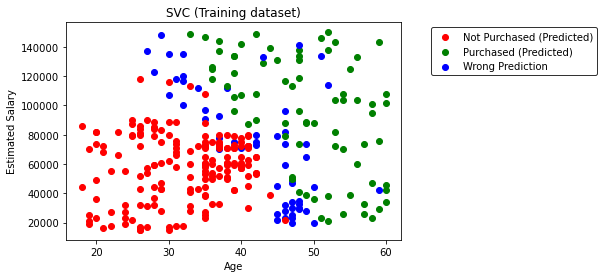

In [15]:
for i in zip(x_sc.inverse_transform(X_train), y_train):
    X = i[0]
    y = i[1]
    y_pred = logistic_regression_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0],
            y=X[1], 
            color=('red', 'green')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(x=X[0],y=X[1], color='blue', label="Wrong Prediction")
plt.title("SVC (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.6, 1))
plt.show()

## Visualising Test Set Result

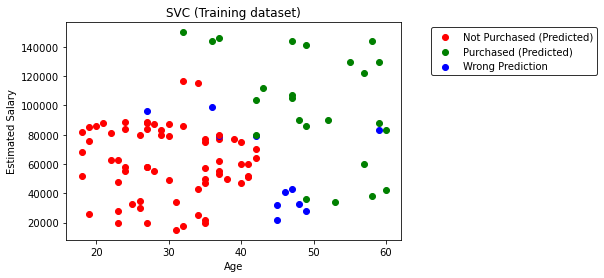

In [16]:
for i in zip(x_sc.inverse_transform(X_test), y_test):
    X = i[0]
    y = i[1]
    y_pred = logistic_regression_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0],
            y=X[1], 
            color=('red', 'green')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(x=X[0],y=X[1], color='blue', label="Wrong Prediction")
plt.title("SVC (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.6, 1))
plt.show()